In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pharma-sales-data/salesdaily.csv
/kaggle/input/pharma-sales-data/salesweekly.csv
/kaggle/input/pharma-sales-data/salesmonthly.csv
/kaggle/input/pharma-sales-data/saleshourly.csv


### Descrição dos dados ###
[Descrição completa e fonte podem ser encontradas aqui](https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data) 

The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories:

M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances

M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives

N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives

N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides

N05B - Psycholeptics drugs, Anxiolytic drugs

N05C - Psycholeptics drugs, Hypnotics and sedatives drugs

R03 - Drugs for obstructive airway diseases

R06 - Antihistamines for systemic use

____________________________________________________

#### **Nosso objetivo é avaliar a venda de diferentes medicamentos, de modo a conseguir capturar alguns insigths importantes como:**
#### 
*1.Quais classes de medicamentos estão apresentando aumento ou diminuição de demanda ao longo dos anos?*

*2. Quais as classes de medicamentos mais e menos vendidos por mês?*

*3. Quais os meses com mais e menos vendas?*

## Importação e pré-processamento ##

In [2]:
#Primeiro, vamos importar e checar a estrutura dos dados
pharma_sales_data = pd.read_csv('/kaggle/input/pharma-sales-data/salesmonthly.csv')
pharma_sales_data.head()
#pharma_sales_data.tail()

#Podemos notar que os dados já estão ordenados pela data e que a coleta dos dados ocorre no último dia de cada mês.
#Vamos ver em qual formato os dados estão armazenados
pharma_sales_data.dtypes

#A coluna de data está com tipo 'object', mas para trabalharmos com as datas corretamente devemos converte-la para o tipo datetime64
pharma_sales_data['datum'] = pd.to_datetime(pharma_sales_data['datum'], format='%Y-%m-%d')
pharma_sales_data.dtypes

datum    datetime64[ns]
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
dtype: object

### 1. Quais classes de medicamentos apresentaram aumento ou diminuição de demanda ao longo dos anos? ##

In [3]:
#Primeiro vamos selecionar os dados referentes aos anos de 2014 (nosso start-point) e de 2019 (nosso end-point)
df_1 = pharma_sales_data.loc[(pharma_sales_data.datum.dt.year == 2014) | (pharma_sales_data.datum.dt.year == 2019)]
df_1.loc[:,'datum'] = df_1.datum.dt.year
df_1 = df_1.groupby('datum').mean() #Calculando a média de vendas para cada classe de medicamento em cada ano
df_1.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014,125.8975,111.132833,140.27325,841.212917,362.916667,25.25,106.416667,69.025
2019,151.7270,111.722100,87.98000,801.161600,240.560000,19.60,205.000000,107.357


In [4]:
delta = df_1.diff()
delta = delta.reset_index()
delta = delta.loc[delta.datum == 2019]
delta = delta.drop(columns='datum')
delta

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
1,25.8295,0.589267,-52.29325,-40.051317,-122.356667,-5.65,98.583333,38.332


<AxesSubplot:xlabel='datum', ylabel='M01AB'>

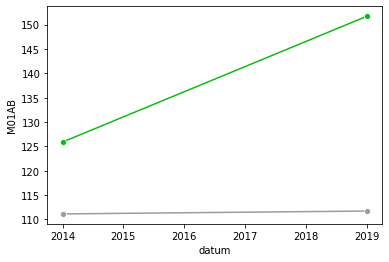

In [5]:
#Vamos comparar o desempenho de medicamentos com ATC similares, começando pelos anti-inflamatórios
sns.lineplot(x=df_1.index, y=df_1.M01AB, ci = None, marker='o', color='#0FBA11')
sns.lineplot(x=df_1.index, y=df_1.M01AE, ci = None, marker='o', color='#9C9C9C')

<AxesSubplot:xlabel='datum', ylabel='N02BA'>

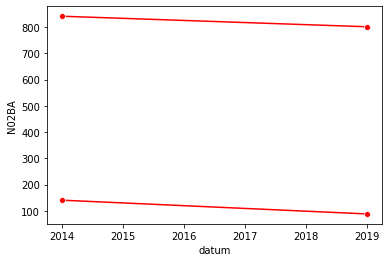

In [6]:
#Outros analgésicos e anti-piréticos
sns.lineplot(x=df_1.index, y=df_1.N02BA, ci = None, marker='o', color='red')
sns.lineplot(x=df_1.index, y=df_1.N02BE, ci = None, marker='o', color='red')

<AxesSubplot:xlabel='datum', ylabel='N05B'>

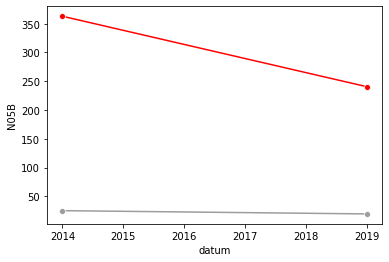

In [7]:
#Psicolépticos
sns.lineplot(x=df_1.index, y=df_1.N05B, ci = None, marker='o', color='red')
sns.lineplot(x=df_1.index, y=df_1.N05C, ci = None, marker='o', color='#9C9C9C')

<AxesSubplot:xlabel='datum', ylabel='R03'>

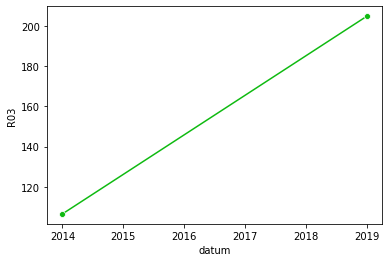

In [8]:
#Fármacos para o tratamento de doenças pulmonares obstrutivas
sns.lineplot(x=df_1.index, y=df_1.R03, ci = None, marker='o', color='#0FBA11')


<AxesSubplot:xlabel='datum', ylabel='R06'>

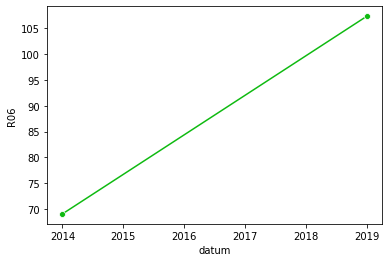

In [9]:
#Anti-histamínicos
sns.lineplot(x=df_1.index, y=df_1.R06, ci = None, marker='o', color='#0FBA11')